# Programmieraufgabe

In [1]:
import numpy as np
np.random.seed(42)

In [2]:
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
mnist = load_digits()
x, y = mnist.data.astype(np.float32), mnist.target.astype(np.float32)
n_samples, n_features = x.shape
print(f"Bilder: {n_samples}\nFeatures: {n_features}")

Bilder: 1797
Features: 64


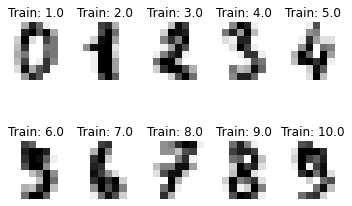

In [4]:
# Ein paar zufällige Bilder plotten
for index, (image, label) in enumerate(zip(x[:10], y[:10])):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Train: {label+1}')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [6]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Aufgabe 1
SVM mit GridSearch programmieren
Was fällt beim Training auf?

In [7]:
parameters = {
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid'], # Verschiedene Kernel
    'gamma': [0.01, 0.001]  # Einer der Hyperparameter
}

clf = SVC()
start_time = time.time()
grid_cv = GridSearchCV(clf, parameters, cv = 10, n_jobs=-1)
grid_cv.fit(x_train, y_train)
end_time = time.time()
print(f"Training wurde nach {end_time-start_time}s beendet")
print(f"Bestes Parameter-Set: {grid_cv.best_params_}")

Training wurde nach 4.293277263641357s beendet
Bestes Parameter-Set: {'gamma': 0.01, 'kernel': 'rbf'}


## Aufgabe 2
Genauigkeit und Confusion-Matrix

In [8]:
y_pred = grid_cv.predict(x_test)
score = grid_cv.score(x_test, y_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Score: {score}")
print(f"Confusion-Matrix:\n{cm}")

Score: 0.975925925925926
Confusion-Matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 50  0  1  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 65  1  0  0  0]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  1  1  0  0  0  0 41  0]
 [ 0  0  0  1  0  1  1  0  1 55]]


# Aufgabe 3
- PCA um Feature-Dimensionen zu verringern
- Min 90% der Varianz behalten
- Anschließend SVM mit GridSearch
- Was fällt auf?

In [16]:
pca = PCA(n_components = 0.90)
pca.fit(x_train)
x_train_transformed = pca.transform(x_train)
x_test_transformed = pca.transform(x_test)

print(f"Dimensionen vorher: {x_train.shape[1]}")
print(f"Dimensionen nach PCA: {x_train_transformed.shape[1]}")
print(f"Explained variance: {sum(pca.explained_variance_ratio_)}")

Dimensionen vorher: 64
Dimensionen nach PCA: 31
Explained variance: 0.9033050439320505


In [20]:
parameters = {
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
    'gamma': [0.01, 0.001]
}

clf = SVC()
start_time = time.time()
grid_cv = GridSearchCV(clf, parameters, cv = 10, n_jobs=-1)
grid_cv.fit(x_train_transformed, y_train)  
end_time = time.time()
print(f"Training wurde nach {end_time-start_time}s beendet")
print(f"Bestes Parameter-Set: {grid_cv.best_params_}")


Training wurde nach 0.7172739505767822s beendet
Bestes Parameter-Set: {'gamma': 0.01, 'kernel': 'rbf'}


# Aufgabe 4
CM und Acc vom besten Parametersatz

In [22]:
y_pred = grid_cv.predict(x_test_transformed)
score = grid_cv.score(x_test_transformed, y_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Score: {score}")
print(f"Confusion-Matrix:\n{cm}")

Score: 0.9722222222222222
Confusion-Matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 49  1  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 50  0  1  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 64  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  1  1  0  0  0  0 41  0]
 [ 0  0  0  0  0  1  1  0  2 55]]
